In [1]:
# this is copied from tile.c and made a Python list
from nle.tiles import GlyphMapper
gm = GlyphMapper()

In [26]:
import IPython.display
import PIL.Image

def display(x):
    IPython.display.display(PIL.Image.fromarray(x))
    
def save(x, name):
    t = PIL.Image.fromarray(x)
    t.save(f"/Users/samvelyan/workspace/{name}.png")
    
display(gm.glyph_id_to_rgb(270)) # oracle
display(gm.glyph_id_to_rgb(1)) # killer bee 

In [27]:
# More reliable test
# Creating custom MiniHack task with many objects

from nle.minihack import MiniHackSkill, LevelGenerator

class MiniHackGUITest(MiniHackSkill):
    """Environment for "eat" task."""

    def __init__(self, *args, obs_crop_h=5, obs_crop_w=5, **kwargs):
        lvl_gen = LevelGenerator(w=5, h=5, lit=True)
        lvl_gen.add_stair_up((2, 2))

        lvl_gen.add_object("apple", "%", place=(0, 0))
        lvl_gen.add_object("pear", "%", place=(0, 1))
        lvl_gen.add_object("dagger", ")", place=(0, 2))
        lvl_gen.add_object("robe", "[", place=(0, 3))
        lvl_gen.add_object("boulder", "`", place=(0, 4))

        lvl_gen.add_terrain((1, 0), "W")  # water
        lvl_gen.add_terrain((1, 1), "L")  # lava
        lvl_gen.add_terrain((1, 2), "T")  # tree
        lvl_gen.add_terrain((1, 3), "{")  # fountain
        lvl_gen.add_terrain((1, 4), "F")  # iron bars

        lvl_gen.add_terrain((4, 0), "|")
        lvl_gen.add_terrain((4, 1), "|")
        lvl_gen.add_terrain((4, 2), "|")
        lvl_gen.add_terrain((4, 3), "|")
        lvl_gen.add_terrain((4, 4), "|")
        lvl_gen.add_door("open", place=(4, 1))
        lvl_gen.add_door("closed", place=(4, 3))

        lvl_gen.add_monster("killer bee", place=(3, 0))
        lvl_gen.add_monster("oracle", place=(3, 1))
        lvl_gen.add_monster("famine", place=(3, 2))
        lvl_gen.add_monster("giant ant", place=(3, 3))
        lvl_gen.add_monster("black dragon", place=(3, 4))

        des_file = lvl_gen.get_des()
        print(des_file)

        kwargs["observation_keys"] = (
            "glyphs_crop",
            "screen_descriptions_crop",
            "pixel_crop",
            "pixel",
        )

        super().__init__(*args, des_file=des_file, **kwargs)


In [129]:
class MiniHackScratch(MiniHackSkill):
    def __init__(self, *args, **kwargs):
        des_file = """
MAZE: "mylevel", ' '
FLAGS:hardfloor, premapped
MESSAGE: "Welcome to MiniHack!"
INIT_MAP: solidfill,' '
GEOMETRY:center,center
MAP
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
ENDMAP
REGION:(0,0,10,10),lit,"ordinary"
$rivers = TERRAIN:{'L','W','I'}
SHUFFLE:$rivers
LOOP [2] {
  TERRAIN:randline (0,0),(10,10),5,$rivers[0]
  MONSTER:
}
REPLACE_TERRAIN:(0,0,10,10),'.','T',5%
STAIR:random,down
"""
        super().__init__(*args, des_file=des_file, **kwargs)

In [130]:
def vis10(x):
    x = x[7*16:17*16,34*16:44*16,:]
    display(x)
    return x
    
def vis15(x):
    m = 4
    n= 31
    x = x[m*16:(m+15)*16,n*16:(n+15)*16,:]
    display(x)
    return x


In [136]:
from nle.minihack.envs.hidenseek import MiniHackHideAndSeek
from nle.minihack.envs.corridor import *

from nle.minihack.envs.mazewalk import *
observation_keys = (
     "pixel_crop",
     "pixel",
)

class mzw(MiniHackMazeWalk):
    def __init__(self, *args, **kwargs):
        kwargs["max_episode_steps"] = kwargs.pop("max_episode_steps", 200)
        super().__init__(*args, w=11, h=11, premapped=True, **kwargs)

# for i in range(10):
#     env = MiniHackMazeWalk15x15Premapped(savedir=None,archivefile=None,observation_keys=observation_keys)
#     obs = env.reset()
#     x = vis15(obs["pixel"])
#     save(x, f"mzwk_{i}")

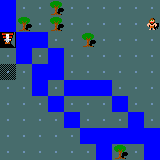

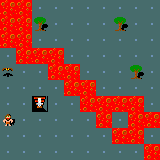

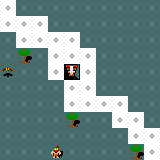

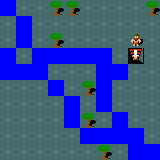

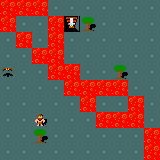

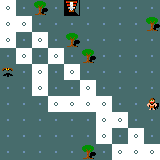

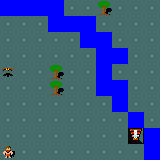

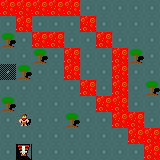

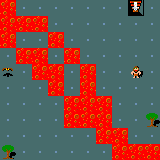

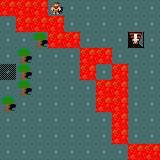

In [137]:
for i in range(10):
    env = MiniHackScratch(savedir=None,archivefile=None,observation_keys=observation_keys)
    obs = env.reset()
    x = vis10(obs["pixel"],)
    save(x, "bb_{}".format(i))

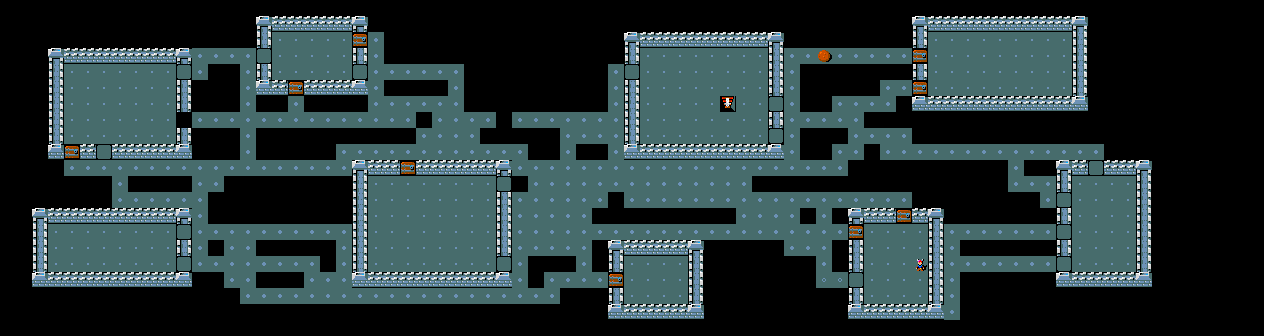

In [154]:
des_file = """
LEVEL: "mylevel"
FLAGS: premapped

ROOM: "ordinary" , lit, random, random, random {
  STAIR: random, up
}
ROOM: "ordinary" , lit, random, random, random {
  STAIR: random, down
}
ROOM: "ordinary" , lit, random, random, random {
}
ROOM: "ordinary" , lit, random, random, random {
}
ROOM: "ordinary" , lit, random, random, random {
}
ROOM: "ordinary" , lit, random, random, random {
}
ROOM: "ordinary" , lit, random, random, random {
}
ROOM: "ordinary" , lit, random, random, random {
}
ROOM: "ordinary" , lit, random, random, random {
}
ROOM: "ordinary" , lit, random, random, random {
}

RANDOM_CORRIDORS

"""
class COR(MiniHackNavigation):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, des_file=des_file, **kwargs)
        
env = COR(savedir=None,archivefile=None,observation_keys=observation_keys)
obs = env.reset()
display(obs["pixel"],)

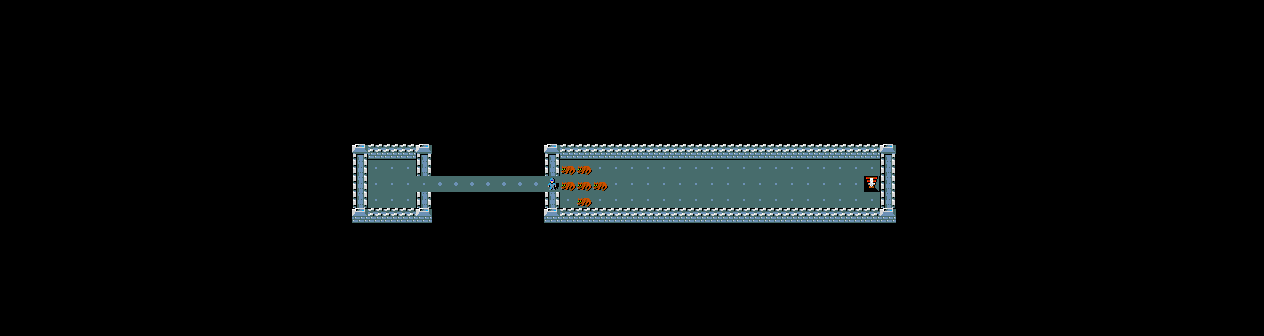

In [172]:
class MiniHackFightCorridor(MiniHackNavigation):
    def __init__(self, *args, lit=True, **kwargs):
        kwargs["character"] = "kni-hum-law-fem"  # tested on human knight
        kwargs["max_episode_steps"] = kwargs.pop("max_episode_steps", 350)

        map = """
-----       ----------------------
|...|       |....................|
|....#######.....................|
|...|       |....................|
-----       ----------------------
"""
        lvl_gen = LevelGenerator(map=map, lit=lit, flags=('premapped',))
        lvl_gen.set_start_pos((12, 2))
        lvl_gen.add_monster(name="giant rat", place=(14, 1))
        lvl_gen.add_monster(name="giant rat", place=(14, 2))
        lvl_gen.add_monster(name="giant rat", place=(14, 3))
        lvl_gen.add_monster(name="giant rat", place=(14, 1))
        lvl_gen.add_monster(name="giant rat", place=(14, 2))
        lvl_gen.add_monster(name="giant rat", place=(14, 3))
        lvl_gen.add_goal_pos((32, 2))

        super().__init__(*args, des_file=lvl_gen.get_des(), **kwargs)

env = MiniHackFightCorridor(savedir=None,archivefile=None,observation_keys=observation_keys)
obs = env.reset()
display(obs["pixel"],)